In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [2]:
x_names = ['L%d%c' % (i, c) for i in range(21) for c in ['x', 'y', 'z']] 
y_names = ['a', 's', 'd', 'f','None']

col_names = x_names + y_names

df = pd.read_csv("asdf_single_log_long_preprocessing.csv", names=col_names)
df.head()

,L0x,L0y,L0z,L1x,L1y,L1z,L2x,L2y,L2z,L3x,...,L19y,L19z,L20x,L20y,L20z,a,s,d,f,None
0,0.058545,0.778253,0.546517,0.000000,0.642058,0.404603,0.000000,0.648604,0.397047,0.000000,...,0.976395,0.288944,0.248863,0.998969,0.315630,0,0,0,0,1.0
1,0.071679,0.732387,0.495070,0.017064,0.637444,0.439591,0.024466,0.650826,0.431415,0.029264,...,0.938779,0.422136,0.270663,0.911718,0.465863,0,0,0,0,1.0
2,0.082491,0.750270,0.322724,0.032436,0.633162,0.423748,0.043175,0.658764,0.402071,0.053609,...,0.928447,0.453917,0.289781,0.889290,0.512221,0,0,0,0,1.0
3,0.097669,0.761451,0.288769,0.047376,0.619648,0.421027,0.060146,0.656053,0.396667,0.075026,...,0.922120,0.474228,0.296221,0.874701,0.543082,0,0,0,0,1.0
4,0.109765,0.774545,0.273541,0.062285,0.608927,0.427914,0.076563,0.651371,0.398856,0.093318,...,0.919796,0.467251,0.302584,0.874344,0.546536,0,0,0,0,1.0


In [3]:
y_names_origin = ['a', 's', 'd', 'f']

for row in range(len(df)):
    df['None'].iloc[row] = 1
    for value in df[y_names_origin].iloc[row]:
        if value == 1:
            df['None'].iloc[row] = 0
            break

/home/hwang/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [4]:
# def gamma_smoothing(df, gamma=0.4):
    
#     df = df.copy()

#     for x in x_names:
#         for row in range(1, len(df)):
#             df[x].iloc[row] = df[x].iloc[row-1] * (1-gamma) + df[x].iloc[row] * gamma

#     return df

# df = gamma_smoothing(df)
# df.head()

In [5]:
# def MinMaxScaler(data):
#     data_max = data.min()
#     data_min = data.max()

#     for i in range(len(data)):
#         data[i] = (data[i] - data_min) / (data_max - data_min)
    
#     return data


# for column in x_names:
#     df_column = df[column]
#     df_column = df_column.values.reshape(-1, 1)
#     df_column = MinMaxScaler(df_column)

#     for row in range(len(df)):
#         df[column].iloc[row] = df_column[row]

In [6]:
x, y = df[x_names], df[y_names]

In [13]:
train_test_ratio = 0.90

train_num = int(len(df) * train_test_ratio)

x_train, x_test = x[:train_num], x[train_num:]
y_train, y_test = y[:train_num], y[train_num:]

x_train_numpy = x_train.to_numpy()
x_test_numpy = x_test.to_numpy()
y_train_numpy = y_train.to_numpy()
y_test_numpy = y_test.to_numpy()

In [16]:
x_train_t = x_train_numpy.reshape(x_train_numpy.shape[0],63,1)
x_test_t = x_test_numpy.reshape(x_test_numpy.shape[0],63,1)

In [61]:
model = Sequential()

model.add(LSTM(50, input_shape=(63,1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 50)                10400     
_________________________________________________________________
dense_12 (Dense)             (None, 64)                3264      
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 325       
Total params: 13,989
Trainable params: 13,989
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(x_train_t, y_train, epochs=20)

Epoch 1/20
127/127 [==============================] - 13s 57ms/step - loss: 1.5705 - accuracy: 0.2577
Epoch 2/20
127/127 [==============================] - 6s 50ms/step - loss: 1.2027 - accuracy: 0.5181
Epoch 3/20
127/127 [==============================] - 7s 52ms/step - loss: 1.0781 - accuracy: 0.5486
Epoch 4/20
127/127 [==============================] - 6s 51ms/step - loss: 1.0056 - accuracy: 0.5813
Epoch 5/20
127/127 [==============================] - 7s 53ms/step - loss: 1.0353 - accuracy: 0.5625
Epoch 6/20
127/127 [==============================] - 7s 56ms/step - loss: 0.9822 - accuracy: 0.5947
Epoch 7/20
127/127 [==============================] - 7s 57ms/step - loss: 0.9417 - accuracy: 0.6197
Epoch 8/20
127/127 [==============================] - 6s 45ms/step - loss: 0.9146 - accuracy: 0.6329
Epoch 9/20
127/127 [==============================] - 5s 39ms/step - loss: 0.8904 - accuracy: 0.6391
Epoch 10/20
127/127 [==============================] - 5s 40ms/step - loss: 0.8401 - accur

In [63]:
model.evaluate(x_test_t, y_test, verbose=2)

15/15 - 3s - loss: 0.3438 - accuracy: 0.9091


[0.3437923789024353, 0.9090909361839294]

In [64]:
predict = model.predict(x_test_t)

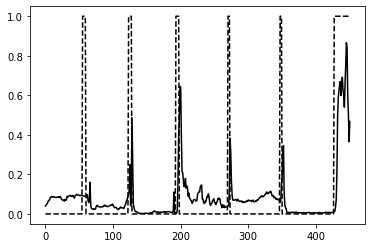

In [65]:
size = len(y_test)

plt.plot(range(size), y_test['None'], 'k--')
plt.plot(range(size), predict[:,4],'k')

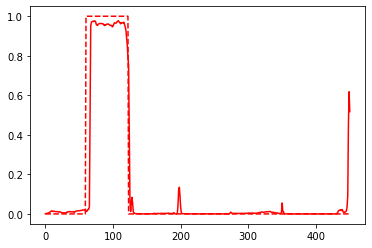

In [66]:
plt.plot(range(size), y_test['a'], 'r--')
plt.plot(range(size), predict[:,0],'r')

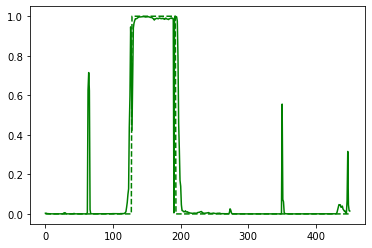

In [67]:
plt.plot(range(size), y_test['s'], 'g--')
plt.plot(range(size), predict[:,1],'g')

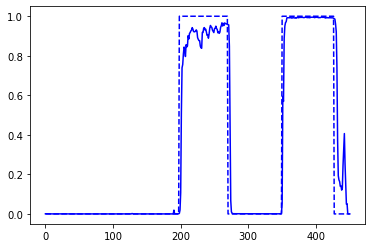

In [68]:
plt.plot(range(size), y_test['d'], 'b--')
plt.plot(range(size), predict[:,2],'b')

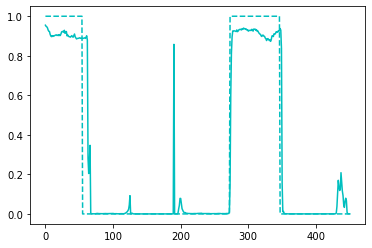

In [69]:
plt.plot(range(size), y_test['f'], 'c--')
plt.plot(range(size), predict[:,3],'c')